### Trapezoidal Rule
The Trapezoidal Rule is a numerical integration method that approximates the definite integral of a function by dividing the area under the curve into trapezoids

Advantages:

- Straightforward geometric interpretation
- Good balance between simplicity and accuracy
- Suitable for functions that are approximately linear over small intervals

Approximate integral using Trapezoidal Rule:
2.6800000000000006
Exact integral: 2.6666666666666665


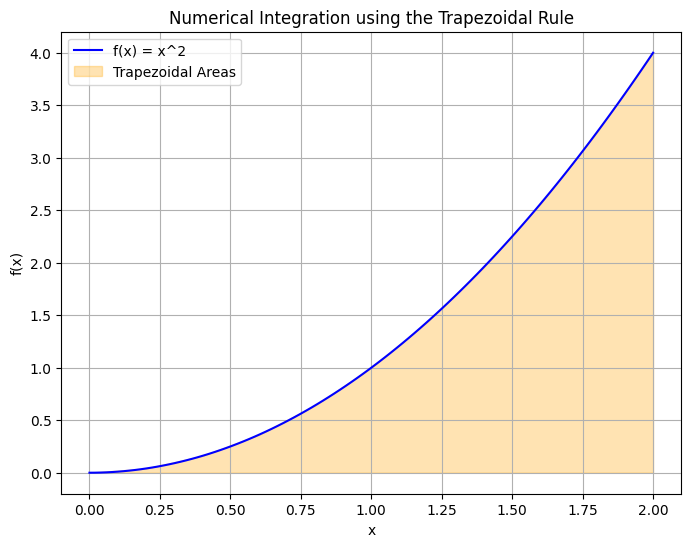

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the integral using the trapezoidal rule
def trapezoidal_rule(f, a, b, n):
    # Calculate the width of each subinterval
    h = (b - a) / n

    # Initialize sum
    sum = 0.5 * (f(a) + f(b))

    # Loop through the intermediate points
    for i in range(1, n):
        x = a + i * h
        sum += f(x)

    # Multiply the sum by the width of each subinterval
    integral = h * sum
    return integral

# Example function to integrate: f(x) = x^2
def example_function(x):
    return x**2

# Test the trapezoidal rule
a = 0  # Lower limit
b = 2  # Upper limit
n = 10  # Number of subintervals

# Calculate the approximate integral
approx_integral = trapezoidal_rule(example_function, a, b, n)
print(f"Approximate integral using Trapezoidal Rule:\n{approx_integral}")

# Exact integral (for comparison)
exact_integral = (b**3 - a**3) / 3
print(f"Exact integral: {exact_integral}")

# Visualization of the function and the trapezoidal rule
x_values = np.linspace(a, b, 100)
y_values = example_function(x_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='f(x) = x^2', color='blue')

# Plot the trapezoids
x_trap = np.linspace(a, b, n+1)
y_trap = example_function(x_trap)
plt.fill_between(x_trap, 0, y_trap, color='orange', alpha=0.3, label='Trapezoidal Areas')

# Labels and legend
plt.title('Numerical Integration using the Trapezoidal Rule')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import sympy as sp

def f(x):
    return 1 / (1 + x**2)

def func_input():
    function_str = input("Enter your function (use 'x' as the variable)\n(Example: 1/x): ")
    x = sp.symbols('x')
    sp_function = sp.sympify(function_str)
    func = sp.lambdify(x, sp_function, modules=['numpy'])
    return func, sp_function

def trapezoidal(func, x0, xn, n):
    # Calculate step size
    h = (xn - x0) / n

    # Compute the initial and final function values
    integration = func(x0) + func(xn)

    # Summing function values at internal points
    for i in range(1, n):
        k = x0 + i * h
        integration += 2 * func(k)

    # Final integration value
    integration *= h / 2
    return integration

def main():
    print("Trapezoidal Rule for Numerical Integration\n")

    function_str = "1 / (1 + x**2)"
    func = f
    lower_limit = 0
    upper_limit = 1
    sub_interval = 6

    default = input("Use default limits? (y/n): ").strip().lower() == "y"
    if not default:
        func, function_str = func_input()
        lower_limit = float(input("Enter lower limit of integration: "))
        upper_limit = float(input("Enter upper limit of integration: "))
        sub_interval = int(input("Enter number of subintervals: "))

    print(f"\nf(x) = {function_str}")
    print(f"Lower Limit: {lower_limit}")
    print(f"Upper Limit: {upper_limit}")
    print(f"Subintervals: {sub_interval}\n")

    result = trapezoidal(func, lower_limit, upper_limit, sub_interval)

    print("Integration Result:")
    print(f"Using the Trapezoidal Method, the approximate value is: {result:.6f}")

if __name__ == "__main__":
    main()


Trapezoidal Rule for Numerical Integration


f(x) = 1 / (1 + x**2)
Lower Limit: 0
Upper Limit: 1
Subintervals: 6

Integration Result:
Using the Trapezoidal Method, the approximate value is: 0.784241


### Simpson's 1/3 rule or 3/8 rule

Simpson's 1/3 Rule is a numerical integration method that approximates the integral of a function by fitting parabolas through groups of three consecutive points.

Simpson's 3/8 Rule is another numerical integration method that fits cubic polynomials through groups of four consecutive points.

Approximate integral using Simpson's 1/3 Rule:
2.6666666666666665
Approximate integral using Simpson's 3/8 Rule:
1.625
Exact integral: 2.6666666666666665


Approximate integral using Simpson's 1/3 Rule:
2.6666666666666665
Approximate integral using Simpson's 3/8 Rule:
1.625
Exact integral: 2.6666666666666665


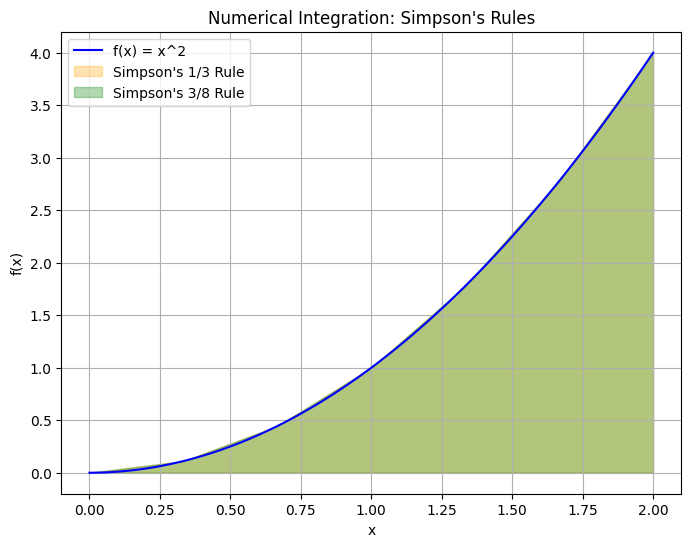

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function for Simpson's 1/3 Rule
def simpsons_1_3_rule(f, a, b, n):
    if n % 2 == 1:  # n must be even
        n += 1
    h = (b - a) / n
    sum = f(a) + f(b)
    for i in range(1, n, 2):
        sum += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        sum += 2 * f(a + i * h)
    return (h / 3) * sum

# Function for Simpson's 3/8 Rule
def simpsons_3_8_rule(f, a, b, n):
    if n % 3 != 0:  # n must be a multiple of 3
        n += 3 - (n % 3)
    h = (b - a) / n
    sum = f(a) + f(b)
    for i in range(1, n, 3):
        sum += 3 * f(a + i * h)
    for i in range(2, n-1, 3):
        sum += 3 * f(a + i * h)
    for i in range(3, n-1, 3):
        sum += 2 * f(a + i * h)
    return (3 * h / 8) * sum

# Example function to integrate
def example_function(x):
    return x**2

# Test the methods
a = 0  # Lower limit
b = 2  # Upper limit
n = 6  # Number of subintervals for both (adjusted for rules)

# Calculate using Simpson's 1/3 Rule
approx_integral_1_3 = simpsons_1_3_rule(example_function, a, b, n)
print(f"Approximate integral using Simpson's 1/3 Rule:\n{approx_integral_1_3}")

# Calculate using Simpson's 3/8 Rule
approx_integral_3_8 = simpsons_3_8_rule(example_function, a, b, n)
print(f"Approximate integral using Simpson's 3/8 Rule:\n{approx_integral_3_8}")

# Exact integral for comparison
exact_integral = (b**3 - a**3) / 3
print(f"Exact integral: {exact_integral}")

# Visualization
x_values = np.linspace(a, b, 100)
y_values = example_function(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='f(x) = x^2', color='blue')

# Plot the areas for Simpson's 1/3 Rule
x_simpson_1_3 = np.linspace(a, b, n+1)
y_simpson_1_3 = example_function(x_simpson_1_3)
plt.fill_between(x_simpson_1_3, 0, y_simpson_1_3, color='orange', alpha=0.3, label="Simpson's 1/3 Rule")

# Plot the areas for Simpson's 3/8 Rule
x_simpson_3_8 = np.linspace(a, b, n+1)
y_simpson_3_8 = example_function(x_simpson_3_8)
plt.fill_between(x_simpson_3_8, 0, y_simpson_3_8, color='green', alpha=0.3, label="Simpson's 3/8 Rule")

# Labels and legend
plt.title("Numerical Integration: Simpson's Rules")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import sympy as sp

def f(x):
    return 1 / (1 + x**2)

def func_input():
    function_str = input("Enter your function (use 'x' as the variable)\n(Example: 1/x): ")
    x = sp.symbols('x')
    sp_function = sp.sympify(function_str)
    func = sp.lambdify(x, sp_function, modules=["numpy"])
    return func, sp_function

def simpson13(func, x0, xn, n):
    if n % 2 != 0:
        raise ValueError("Number of subintervals (n) must be even.")

    # Calculate step size
    h = (xn - x0) / n

    # Compute the initial and final function values
    integration = func(x0) + func(xn)

    # Summing function values at internal points
    for i in range(1, n):
        k = x0 + i * h
        if i % 2 == 0:
            integration += 2 * func(k)
        else:
            integration += 4 * func(k)

    # Final integration value
    integration *= h / 3
    return integration

def main():
    print("Simpson's 1/3 Rule for Numerical Integration\n")

    function_str = "1 / (1 + x**2)"
    func = f
    lower_limit = 0
    upper_limit = 1
    sub_interval = 6

    default = input("Use default limits? (y/n): ").strip().lower() == "y"
    if not default:
        func, function_str = func_input()
        lower_limit = float(input("Enter lower limit of integration: "))
        upper_limit = float(input("Enter upper limit of integration: "))
        sub_interval = int(input("Enter number of subintervals (must be even): "))

    print(f"\nf(x) = {function_str}")
    print(f"Lower Limit: {lower_limit}")
    print(f"Upper Limit: {upper_limit}")
    print(f"Subintervals: {sub_interval}\n")

    result = simpson13(func, lower_limit, upper_limit, sub_interval)

    print("Integration Result:")
    print(f"Using Simpson's 1/3 method, the approximate value is:\n{result:.6f}")

if __name__ == "__main__":
    main()


### Boole's Rule (Weddle’s Rule)

Boole's Rule, also known as Weddle's Rule, is a numerical integration method that approximates the integral of a function by fitting a fourth-degree polynomial (quartic) through five equally spaced points.

Approximate integral using Boole's Rule: 2.666666666666667
Exact integral: 2.6666666666666665


Approximate integral using Boole's Rule: 2.666666666666667
Exact integral: 2.6666666666666665


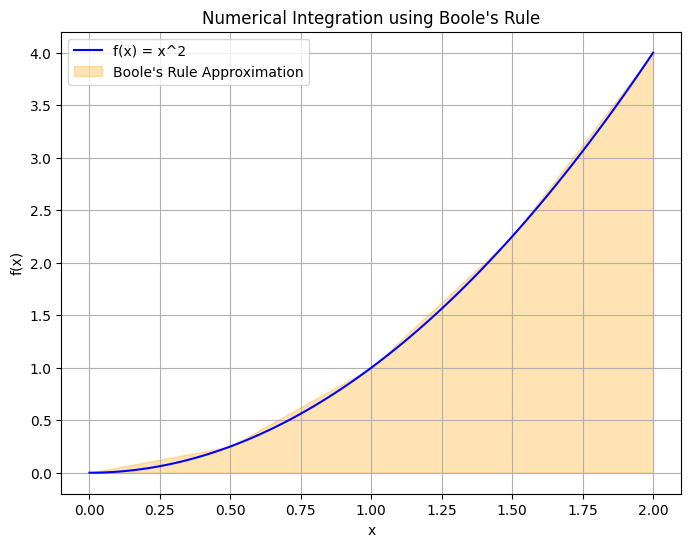

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate (for example, f(x) = x^2)
def example_function(x):
    return x**2

# Boole's Rule (Weddle's Rule) for numerical integration
def booles_rule_fixed(f, a, b):
    # Divide the interval into four subintervals
    h = (b - a) / 4  # Step size

    x0 = a
    x1 = a + h
    x2 = a + 2 * h
    x3 = a + 3 * h
    x4 = b

    # Apply Boole’s Rule formula
    result = (2 * h / 45) * (7 * f(x0) + 32 * f(x1) + 12 * f(x2) + 32 * f(x3) + 7 * f(x4))
    return result

# Test the function with specific bounds
a = 0  # Lower bound
b = 2  # Upper bound

# Calculate the approximate integral using the corrected Boole's Rule
approx_integral = booles_rule_fixed(example_function, a, b)
print(f"Approximate integral using Boole's Rule: {approx_integral}")

# Exact integral for comparison (for f(x) = x^2, exact integral is (b^3 – a^3)/3)
exact_integral = (b**3 - a**3) / 3
print(f"Exact integral: {exact_integral}")

# Visualization of the function and the integration area
x_values = np.linspace(a, b, 100)
y_values = example_function(x_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="f(x) = x^2", color='blue')

# Shading the area under the curve for integration using Boole’s Rule
x_boole = np.array([
    a, 
    a + (b - a) / 4, 
    a + 2 * (b - a) / 4, 
    a + 3 * (b - a) / 4, 
    b
])
y_boole = example_function(x_boole)
plt.fill_between(x_boole, 0, y_boole, color='orange', alpha=0.3, label="Boole's Rule Approximation")

# Labels and legend
plt.title("Numerical Integration using Boole's Rule")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


### Gauss-legendre integration 

Gauss-Legendre Integration is a numerical method for approximating definite integrals. It uses specific points (roots of Legendre polynomials) and corresponding weights to achieve high accuracy.

Approximate integral using Gauss–Legendre Quadrature:
2.6666666666666665
Exact integral: 2.6666666666666665


Approximate integral using Gauss–Legendre Quadrature:
2.6666666666666665
Exact integral: 2.6666666666666665


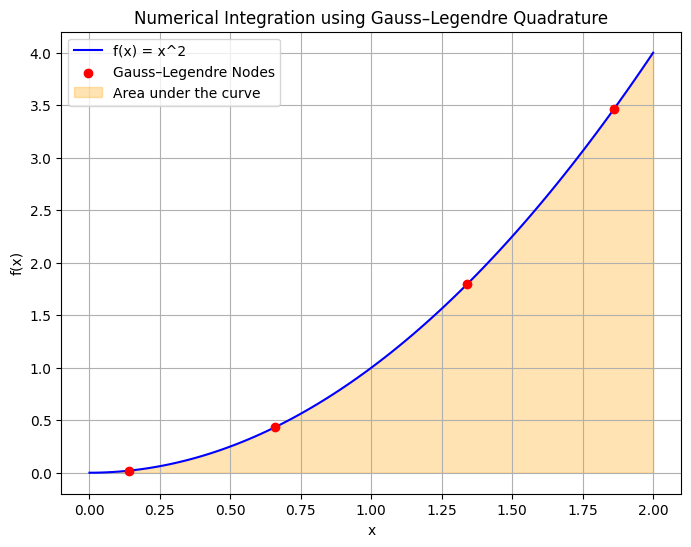

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

# Function to integrate
def function_to_integrate(x):
    return x**2  # Example: f(x) = x^2

# Gauss-Legendre Quadrature implementation
def gauss_legendre_integration(f, a, b, n):
    # Get the roots and weights for Legendre polynomial of degree n
    roots, weights = roots_legendre(n)

    # Map roots and weights to the interval [a, b]
    mapped_roots = 0.5 * (b - a) * roots + 0.5 * (b + a)
    mapped_weights = 0.5 * (b - a) * weights

    # Compute the integral
    integral = np.sum(mapped_weights * f(mapped_roots))
    return integral

# Define the limits and number of nodes
a = 0  # Lower limit
b = 2  # Upper limit
n = 4  # Number of nodes (degree of Legendre polynomial)

# Compute the approximate integral
approx_integral = gauss_legendre_integration(function_to_integrate, a, b, n)
print(f"Approximate integral using Gauss–Legendre Quadrature:\n{approx_integral}")

# Compute the exact integral for comparison
exact_integral = (b**3 - a**3) / 3  # Integral of x^2 is x^3 / 3
print(f"Exact integral: {exact_integral}")

# Visualization
x = np.linspace(a, b, 100)
y = function_to_integrate(x)

# Plot the function and nodes
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = x^2", color='blue')

# Plot the Gauss–Legendre nodes
roots, _ = roots_legendre(n)
mapped_roots = 0.5 * (b - a) * roots + 0.5 * (b + a)
plt.scatter(mapped_roots, function_to_integrate(mapped_roots),
            color='red', label="Gauss–Legendre Nodes", zorder=5)

# Fill area under the curve
plt.fill_between(x, 0, y, color='orange', alpha=0.3, label="Area under the curve")

# Labels and legend
plt.title("Numerical Integration using Gauss–Legendre Quadrature")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
